In [1]:
! wget http://cb.lk/covid_19

--2023-04-10 08:48:14--  http://cb.lk/covid_19
Resolving cb.lk (cb.lk)... 172.67.187.81, 104.21.72.203, 2606:4700:3032::ac43:bb51, ...
Connecting to cb.lk (cb.lk)|172.67.187.81|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2023-04-10 08:48:14--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip [following]
--2023-04-10 08:48:15--  https://www.dropbox.com/s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc34d485

In [2]:
! unzip '/kaggle/working/covid_19'

Archive:  /kaggle/working/covid_19
  inflating: CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg  
  inflating: CovidDataset/Val/Covid/85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg  
  inflating: CovidDataset/Val/Covid/4-x-day1.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-53.jpg  
  inflating: CovidDataset/Val/Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-35-1.jpg  
  inflating: CovidDataset/Val/Covid/53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg  
  inflating: CovidDataset/Val/Covid/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg  
  inflating: CovidDataset/Val/Covid/58cb9263f16e94305c730685358e4e_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/6b3bdbc31f65230b8cdcc3cef5f8ba8a-40ac-0.jpg  
  inflating: CovidDataset/Val/Covid/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg  
  inflating: CovidDataset/Val/Covid/6b44464d-73a

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img ,img_to_array
from keras.models import Sequential,Model
from tensorflow.keras.applications import ResNet50V2
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D,Dropout,MaxPooling2D,Flatten,Dense,BatchNormalization
import keras
import os

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [5]:
training_set = train_datagen.flow_from_directory(
    '/kaggle/working/CovidDataset/Train', 
    color_mode="rgb",
    target_size=(224,224),
    batch_size=8,
    class_mode='categorical'
)

Found 224 images belonging to 2 classes.


In [6]:
test_set = test_datagen.flow_from_directory(
    '/kaggle/working/CovidDataset/Val', 
    color_mode="rgb",
    target_size=(224,224),
    batch_size=4,
    class_mode='categorical'
)

Found 60 images belonging to 2 classes.


In [7]:
model = ResNet50V2(include_top=False, input_shape=(224, 224, 3))
for layer in model.layers:
    layer.trainable = False
x = model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
out = Dense(2, activation='softmax')(x)
model = Model(model.input, out)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

94668760/94668760 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                             

In [8]:
from tensorflow.keras.callbacks import EarlyStopping
custom_early_stopping = EarlyStopping(
    monitor='val_accuracy', 
    patience=4, 
    mode='max'
)
res = model.fit(training_set,
          epochs = 20,
          callbacks=[custom_early_stopping],
          validation_data = test_set)

Epoch 1/64
28/28 [==============================] - 22s 397ms/step - loss: 0.2421 - accuracy: 0.9107 - val_loss: 0.1105 - val_accuracy: 0.9667
Epoch 2/64
28/28 [==============================] - 11s 381ms/step - loss: 0.1026 - accuracy: 0.9598 - val_loss: 0.0076 - val_accuracy: 1.0000
Epoch 3/64
28/28 [==============================] - 10s 377ms/step - loss: 0.1373 - accuracy: 0.9554 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 4/64
28/28 [==============================] - 10s 350ms/step - loss: 0.0560 - accuracy: 0.9821 - val_loss: 2.7108e-04 - val_accuracy: 1.0000
Epoch 5/64
28/28 [==============================] - 10s 359ms/step - loss: 0.0967 - accuracy: 0.9732 - val_loss: 0.0043 - val_accuracy: 1.0000
Epoch 6/64
28/28 [==============================] - 10s 367ms/step - loss: 0.0519 - accuracy: 0.9866 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 7/64
28/28 [==============================] - 10s 357ms/step - loss: 0.2197 - accuracy: 0.9598 - val_loss: 7.3017e-04 - val_accuracy

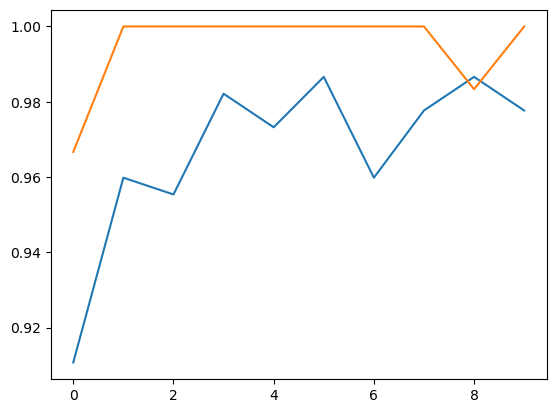

In [9]:
plt.plot(res.history['accuracy'])
plt.plot(res.history['val_accuracy'])

In [10]:
model.evaluate(test_set)

15/15 [==============================] - 2s 128ms/step - loss: 0.0088 - accuracy: 1.0000


[0.008790790103375912, 1.0]

In [11]:
predict=model.predict(test_set)
predict=np.argmax(predict,axis = 1)
from sklearn.metrics import accuracy_score
Acc = accuracy_score(test_set.classes,predict)
print("Accuracy = ", Acc)

15/15 [==============================] - 3s 142ms/step
Accuracy =  0.4666666666666667
